El primer paso en un Anásis Exploratorio de Datos (EDA) siempre es entender el Set de Datos y sus variables:

**Set de Datos:** Este conjunto, extraído de Yahoo Finance, abarca los datos de las acciones de Apple, IBM, Google, Meta, Amazon, Tesla y Microsoft durante los últimos 10 años, desde el 1 de enero de 2013 hasta el 19 de septiembre de 2023. Proporciona información fundamental para el análisis financiero y la toma de decisiones en el mercado de valores. Yahoo Finance es una reconocida plataforma que ofrece datos financieros y herramientas de análisis para inversionistas y profesionales del sector.

* **Date:** Esta columna indica la fecha en la que se registraron los datos. Cada fila corresponde a un día de negociación en el mercado de valores.

* **Open:** El precio (USD) de apertura de las acciones en el día especificado. Es el precio al que se negociaron las primeras acciones en ese día.

* **High:** El precio (USD) más alto alcanzado por las acciones durante ese día de negociación. Representa el precio máximo al que las acciones se cotizaron en ese día.

* **Low:** El precio (USD) más bajo alcanzado por las acciones durante ese día. Representa el precio mínimo al que las acciones se cotizaron en ese día.

* **Close:** El precio (USD) de cierre de las acciones al final del día de negociación. Es el precio al que se negociaron las últimas acciones en ese día.

* **Adj Close:** El precio (USD) de cierre ajustado tiene en cuenta eventos como divisiones de acciones y dividendos. Proporciona una vista más precisa del rendimiento de la inversión a lo largo del tiempo. Es el precio de cierre que se utilizaría para calcular los retornos históricos.

* **Volume:** La cantidad total de acciones de la empresa que se negociaron durante ese día de negociación. Representa la actividad comercial y la liquidez del mercado para las acciones de esa empresa en ese día.

* **id_company:** Proporciona los códigos identificativos de cada empresa según su ticker en Yahoo Finance, permitiendo una asociación directa entre los datos y la empresa correspondiente:

```
company_dictionary={"Apple":"AAPL", "IBM":"IBM", "Google":"GOOG", "Meta":"META", "Amazon":"AMZN", "Tesla": "TSLA", "Microsoft":"MSFT"}
```

In [104]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
# Carga de datos
df=pd.read_csv("https://raw.githubusercontent.com/JersonGB22/DataScience_IBM_StockPredictionLSTM_Project/main/DataStorage/datasets_company.csv")
df["Date"]=pd.to_datetime(df.Date) # Conversión de las fechas al tipo datetime
df

,Date,Open,High,Low,Close,Adj Close,Volume,id_company
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791185,560518000,AAPL
1,2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,65420000,AMZN
2,2013-01-02,27.440001,28.180000,27.420000,28.000000,28.000000,69846400,META
3,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000,TSLA
4,2013-01-02,27.250000,27.730000,27.150000,27.620001,22.620338,52899300,MSFT
...,...,...,...,...,...,...,...,...
18867,2023-09-18,137.630005,139.929993,137.630005,138.960007,138.960007,16233600,GOOG
18868,2023-09-18,140.479996,141.750000,139.220001,139.979996,139.979996,42823500,AMZN
18869,2023-09-18,145.770004,146.479996,145.059998,145.089996,145.089996,2508100,IBM
18870,2023-09-18,298.190002,303.600006,297.799988,302.549988,302.549988,14234200,META


In [3]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18872 entries, 0 to 18871
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        18872 non-null  datetime64[ns]
 1   Open        18872 non-null  float64       
 2   High        18872 non-null  float64       
 3   Low         18872 non-null  float64       
 4   Close       18872 non-null  float64       
 5   Adj Close   18872 non-null  float64       
 6   Volume      18872 non-null  int64         
 7   id_company  18872 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.2+ MB


**Se puede apreciar que todas las columnas del dataset no tiene ningún valor nulo**

In [4]:
# No existe ningún valor duplicado
df[df.duplicated(keep=False)]

,Date,Open,High,Low,Close,Adj Close,Volume,id_company


**Para trabajar en la construcción de un modelo de forecasting de series de tiempo utilizando redes LSTM, es crucial verificar que la periodicidad de las muestras de cada empresa sea precisamente de un día (24 horas), lo cual es relevante para nuestro caso:**

In [5]:
for c in df.id_company.unique():
  print(f"{c}: ")
  mask=df[df.id_company==c].Date.diff().dt.total_seconds()/3600
  print(mask.value_counts(),"\n")

AAPL: 
24.0    2112
72.0     485
96.0      74
48.0      24
Name: Date, dtype: int64 

AMZN: 
24.0    2112
72.0     485
96.0      74
48.0      24
Name: Date, dtype: int64 

META: 
24.0    2112
72.0     485
96.0      74
48.0      24
Name: Date, dtype: int64 

TSLA: 
24.0    2112
72.0     485
96.0      74
48.0      24
Name: Date, dtype: int64 

MSFT: 
24.0    2112
72.0     485
96.0      74
48.0      24
Name: Date, dtype: int64 

IBM: 
24.0    2112
72.0     485
96.0      74
48.0      24
Name: Date, dtype: int64 

GOOG: 
24.0    2112
72.0     485
96.0      74
48.0      24
Name: Date, dtype: int64 



Se observa que en cada empresa es la misma situación de periodicidad:

- 485 pares de registros tienen diferencias de 72h (3 días)
- 74 pares de registros tiene diferencias de 96h (4 días)
- 24 par de registros tiene diferencias de 48h (2 días)

Esto se tratará en la etapa de ETL.

**Función para graficar la evolución de cada variable en los últimos 10 años:**

In [6]:
def graph_lineplot(df, id):
  df2=df.copy()
  df2=df2[df2.id_company==id]

  fig, ax = plt.subplots(6, 1, figsize=(12, 16), sharex=True)
  for i, c in enumerate(df2.columns[1:-1]):
    colors=sns.color_palette("colorblind", 6)
    sns.lineplot(x="Date", y=c, data=df2, color=colors[i], ax=ax[i], label=c)
    fig.suptitle(f"Distribución de las Variables a través del Tiempo (Company: {id})")
    ax[i].set_ylabel("");

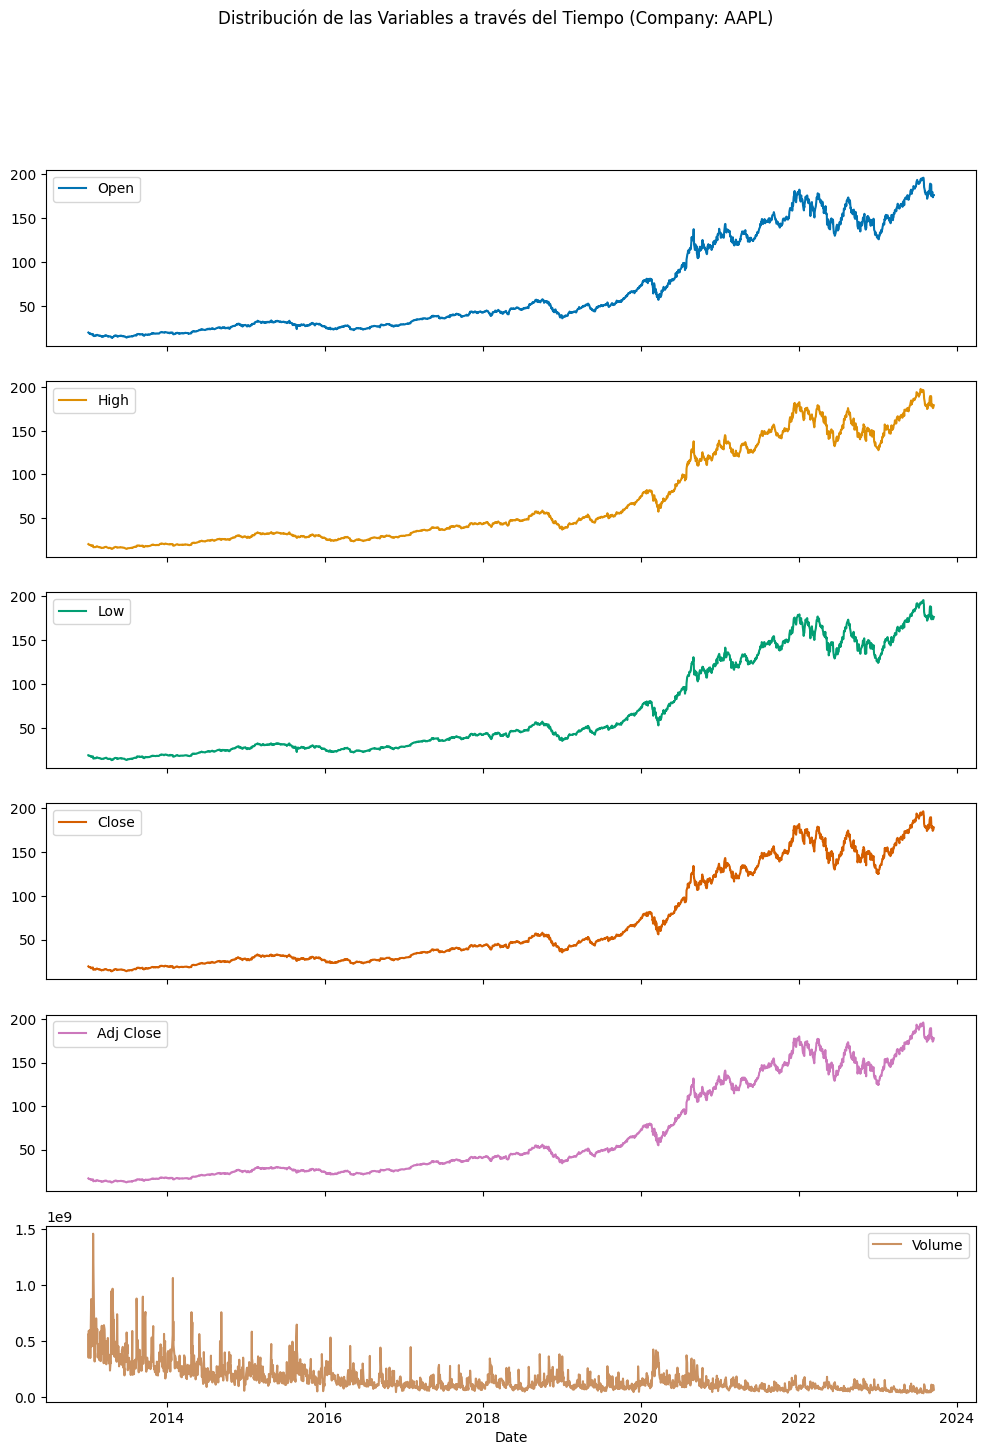

In [7]:
# Apple
graph_lineplot(df, "AAPL")

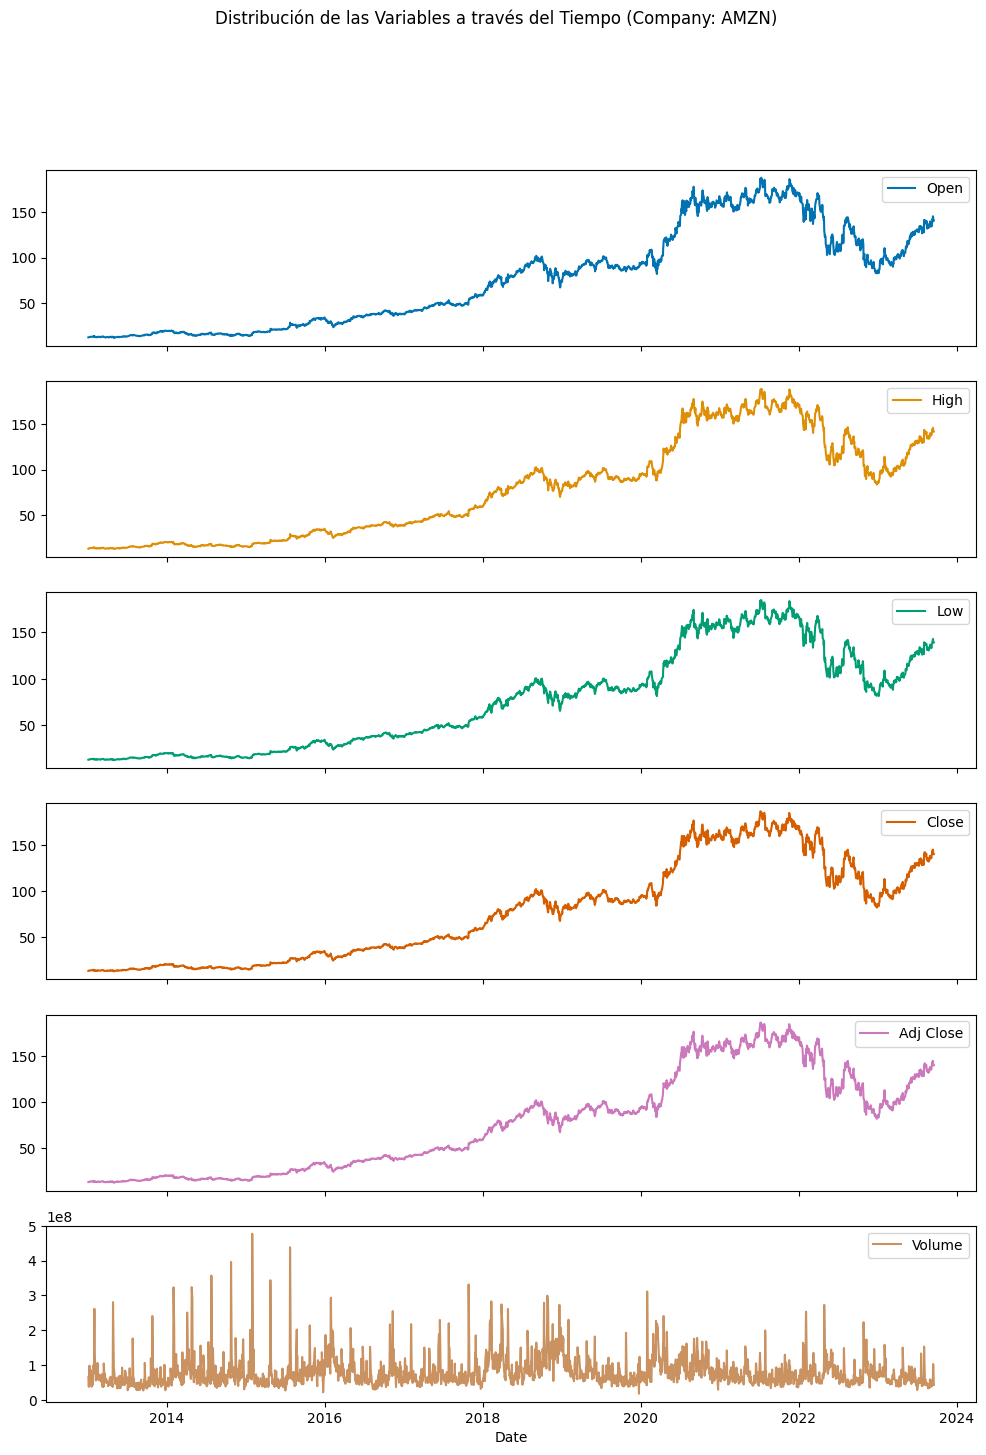

In [8]:
# Amazon
graph_lineplot(df, "AMZN")

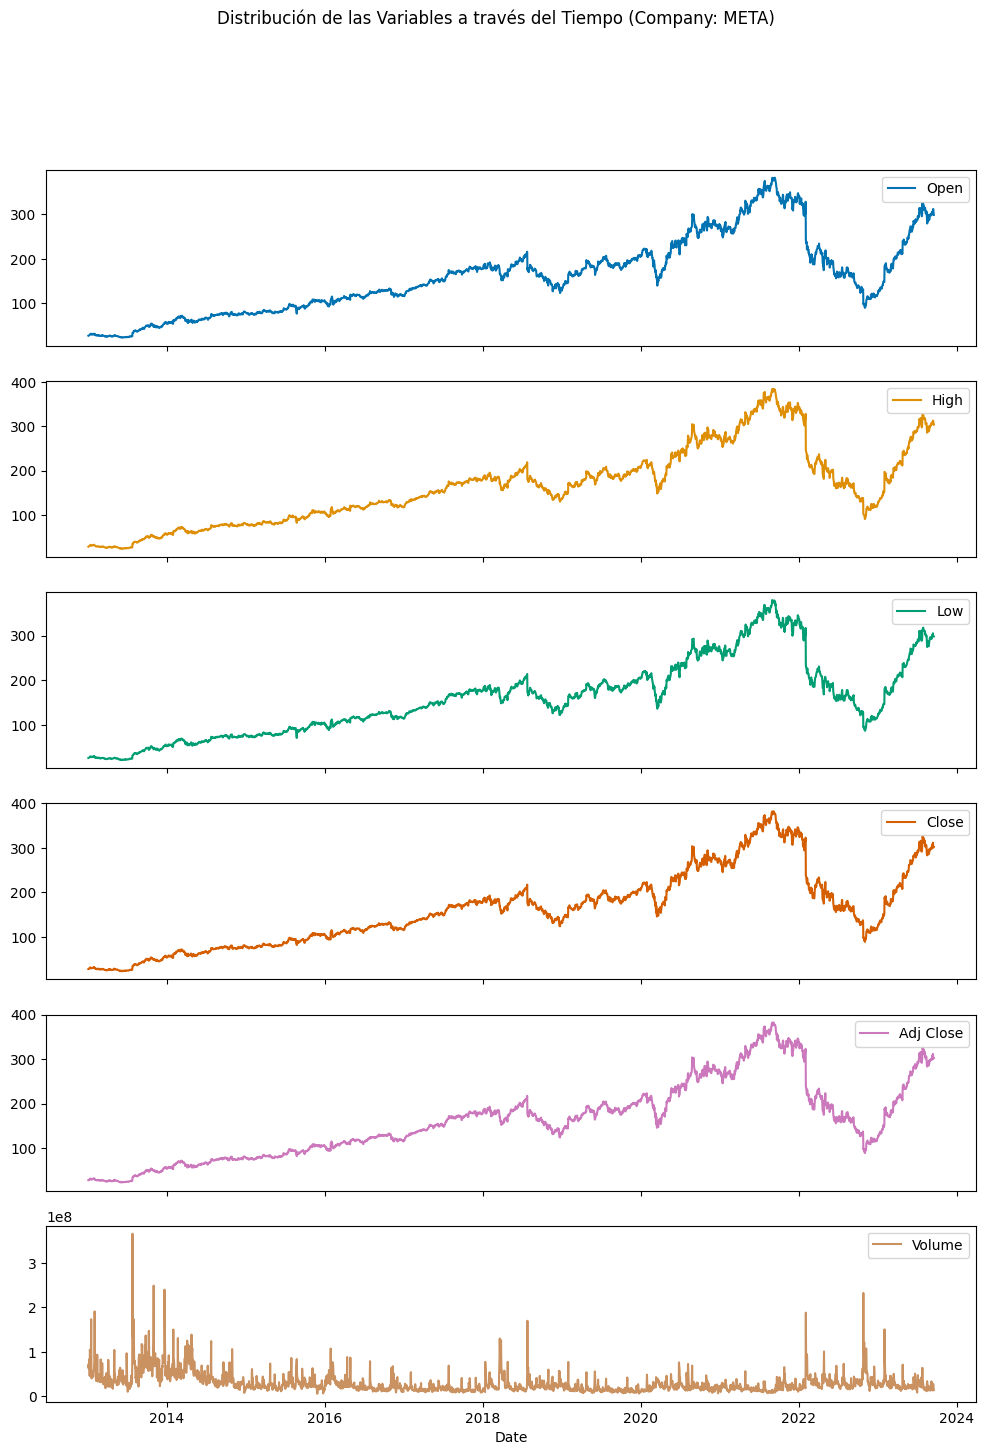

In [9]:
# Meta
graph_lineplot(df, "META")

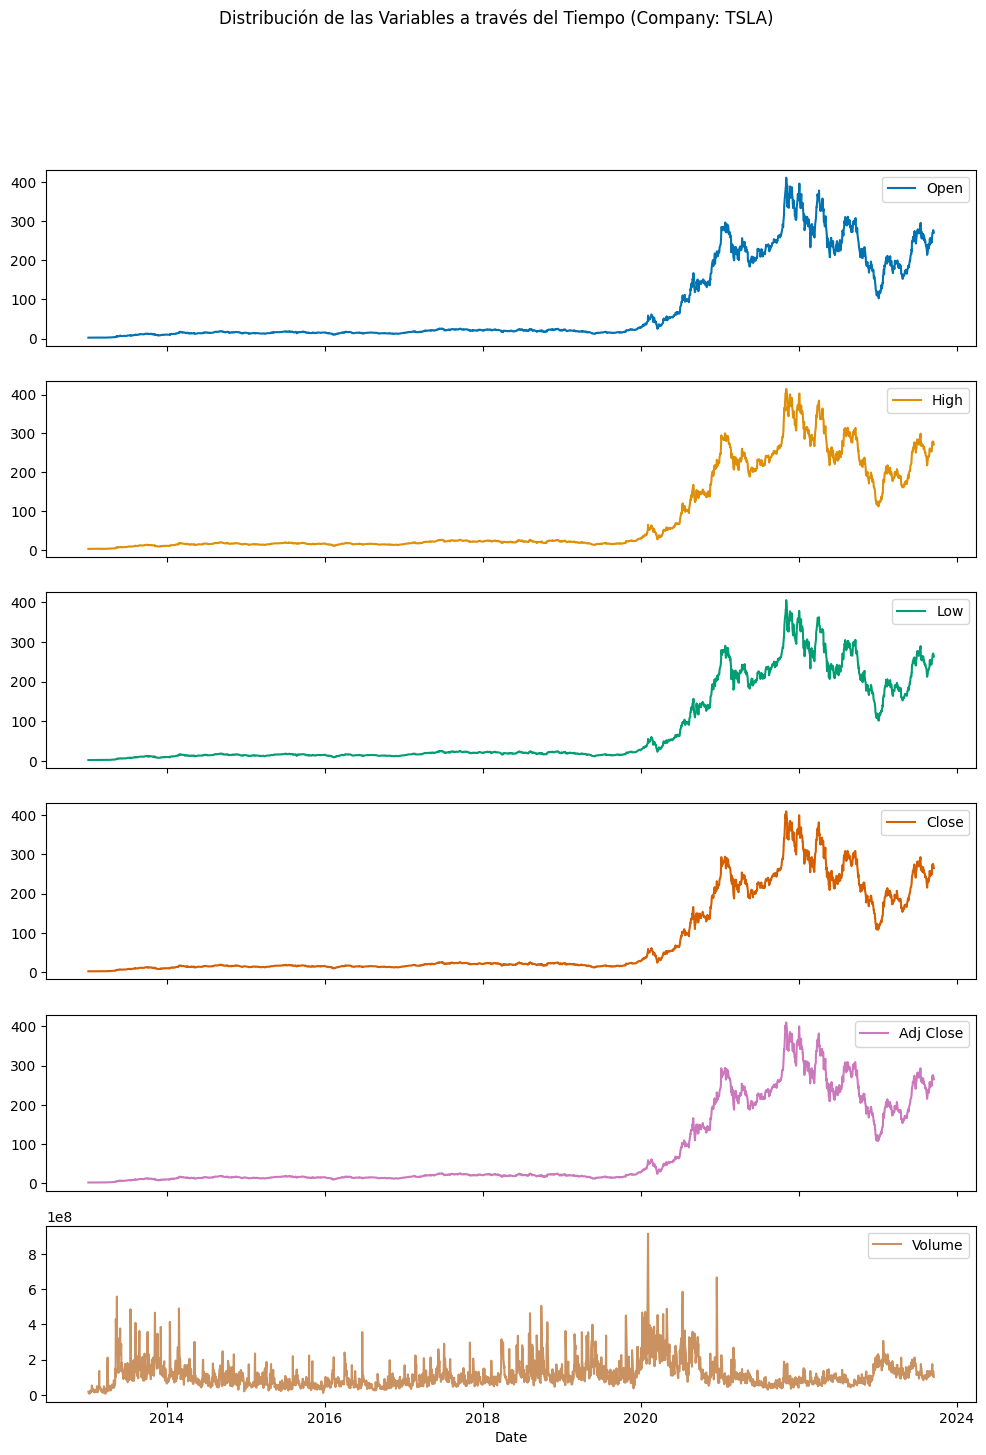

In [10]:
# Tesla
graph_lineplot(df, "TSLA")

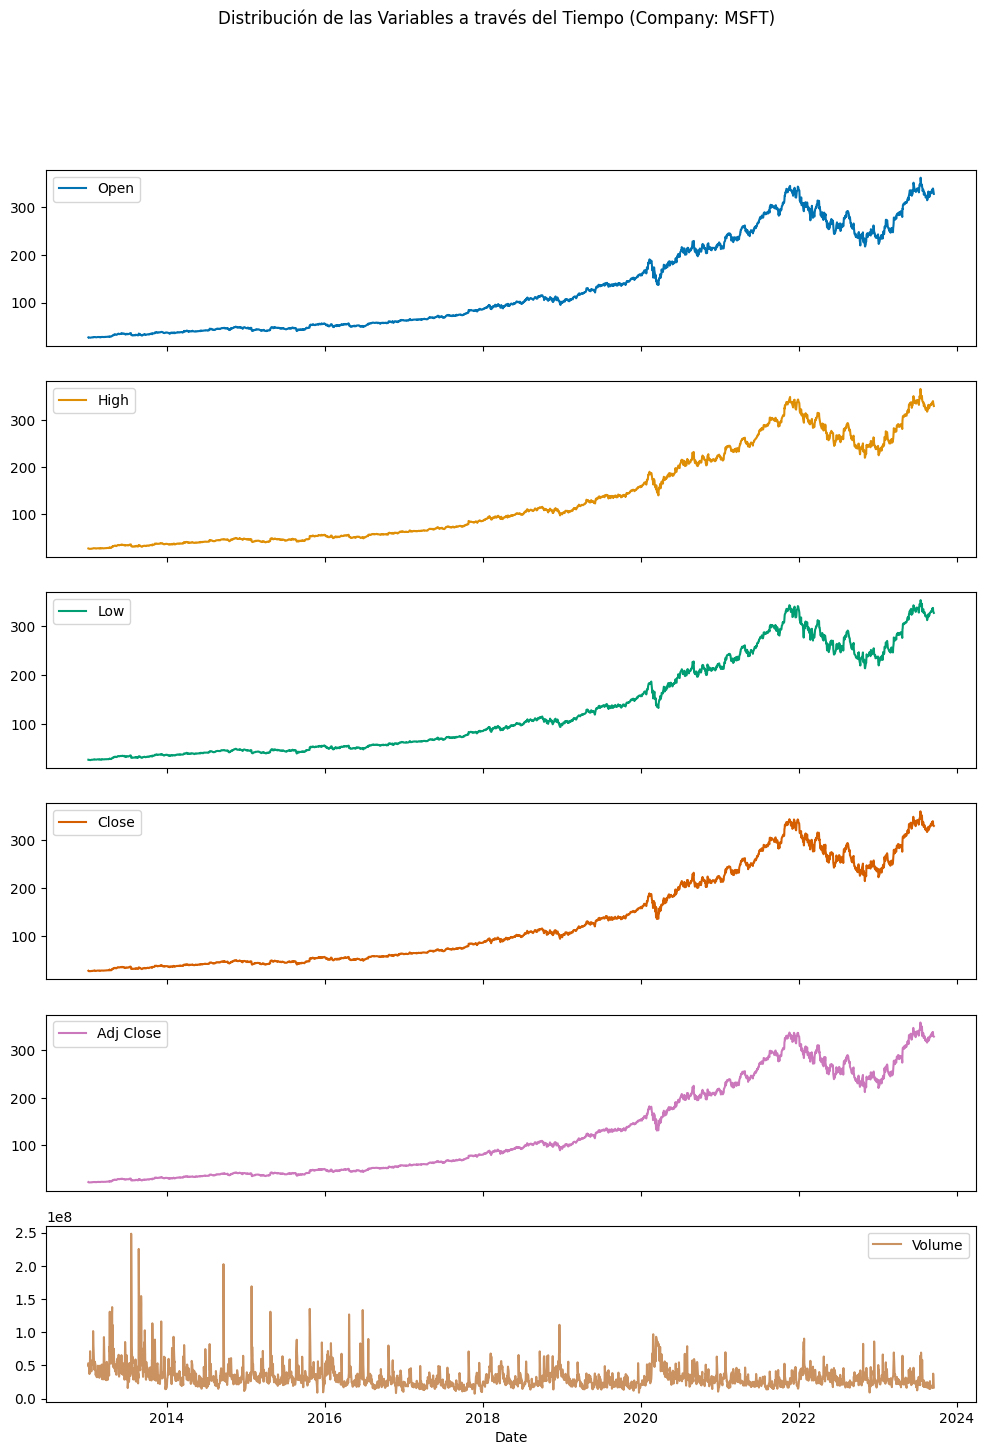

In [11]:
# Microsoft
graph_lineplot(df, "MSFT")

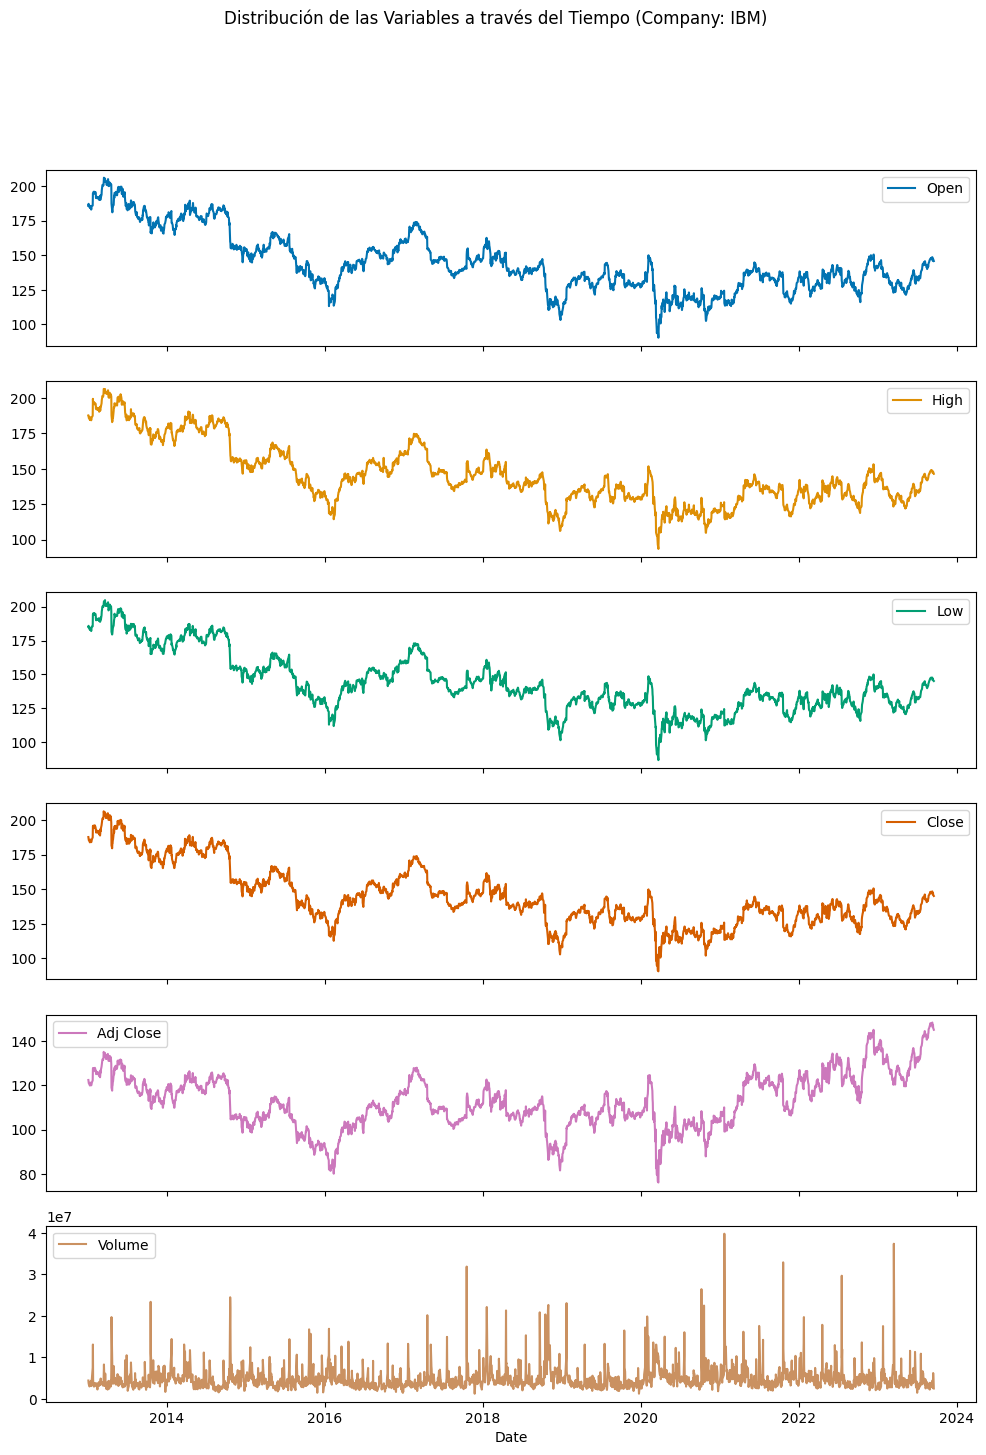

In [12]:
# IBM
graph_lineplot(df, "IBM")

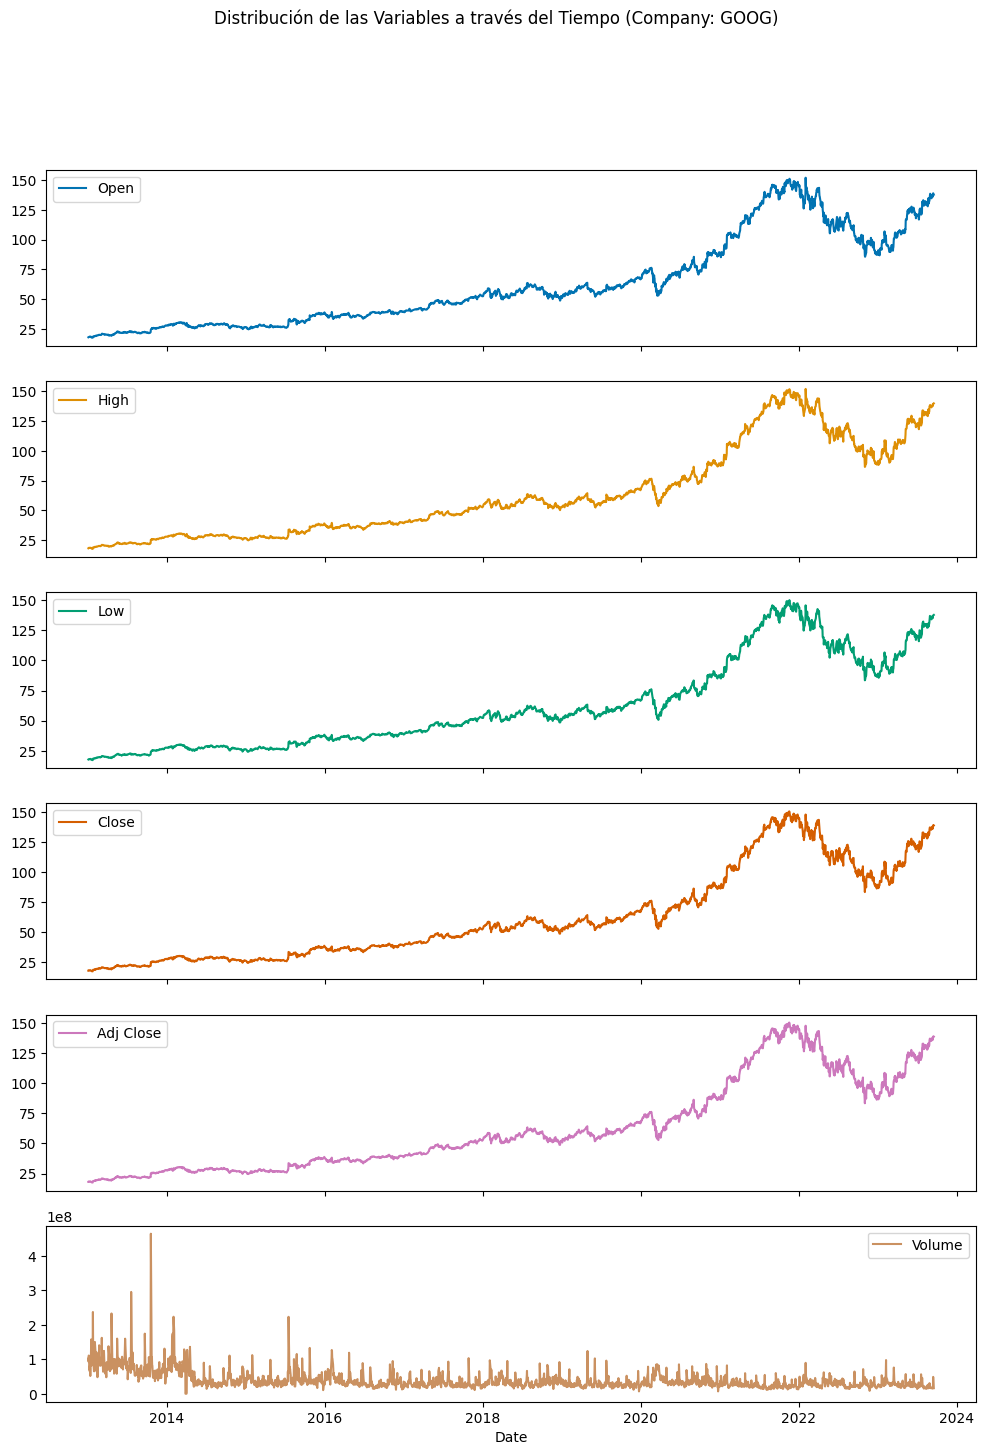

In [13]:
# Google
graph_lineplot(df, "GOOG")

**Observación:** Al analizar la distribución de las variables en el transcurso de la última década en las empresas seleccionadas, se destaca una tendencia general al crecimiento en la mayoría de las métricas. No obstante, es importante notar que el volumen de operaciones (volume) parece carecer de una tendencia discernible, lo que sugiere una variabilidad constante en la actividad comercial. Además, se identifica un patrón interesante en la evolución de los precios de las acciones de IBM, donde históricamente mostraron una tendencia a la baja, pero en los últimos años han experimentado un resurgimiento alcista, lo que podría indicar un cambio en la dinámica del mercado para esta empresa.

**Función para visualizar outliers de una variable determinada:**

In [46]:
def graph_boxplot(df, column):
  fig, ax = plt.subplots(1, 7, figsize=(12, 5))
  companies=df.id_company.unique()
  colors=sns.color_palette("colorblind", 7)

  for i, c in enumerate(companies):
    sns.boxplot(y=column, data=df[df.id_company==c], color=colors[i], ax=ax[i])
    fig.suptitle(f"Distribución de la Variable '{column}' en las Compañías")
    ax[i].set_xlabel(c)
    ax[i].set_ylabel("")
  ax[0].set_ylabel(column)
  plt.tight_layout();

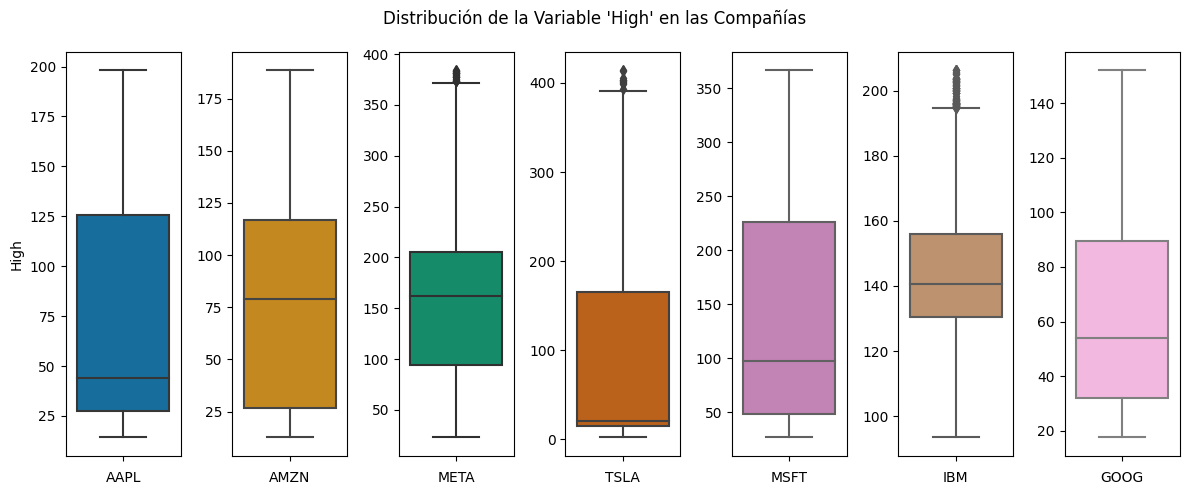

In [47]:
# Considerando la variable a predecir en nuestro modelo
graph_boxplot(df, "High")

In [49]:
df[df.id_company=="TSLA"].High.median(), df[df.id_company=="META"].High.median()

(20.515667, 161.675003)

**Observación:** Se destaca que, en general, el valor máximo de las acciones en las diversas empresas no presenta outliers, con la excepción de Meta, Tesla e IBM, que exhiben algunos valores outliers superiores que no representan anomalías en los datos. Además, se aprecia variabilidad en las medianas, oscilando desde un mínimo de 20.52 en Tesla hasta un máximo de 161.68 en Meta. También es notable que, en la mayoría de los casos, la distancia entre el primer cuartil (Q1) y la mediana (Q2) es relativamente corta en comparación con la distancia entre la mediana y el tercer cuartil (Q3), lo que indica que la mayoría de los datos se concentran en la mitad superior de la distribución. Este patrón sugiere una significativa concentración de datos en el extremo superior, lo que podría resultar en una cola larga hacia la derecha en la distribución de los datos.

**Función para visualizar la distribución de una variable mediante histogramas**

In [66]:
def graph_histplot(df, column):
  fig, ax = plt.subplots(7, 1, figsize=(10, 14))
  companies=df.id_company.unique()
  colors=sns.color_palette("colorblind", 7)

  for i, c in enumerate(companies):
    sns.histplot(x=column, data=df[df.id_company==c], color=colors[i], ax=ax[i], kde=True, stat="percent")
    fig.suptitle(f"Distribución de la Variable '{column}' en las Compañías")
    ax[i].set_xlabel("")
    ax[i].set_ylabel(c)
  ax[i].set_xlabel(column)
  plt.tight_layout();

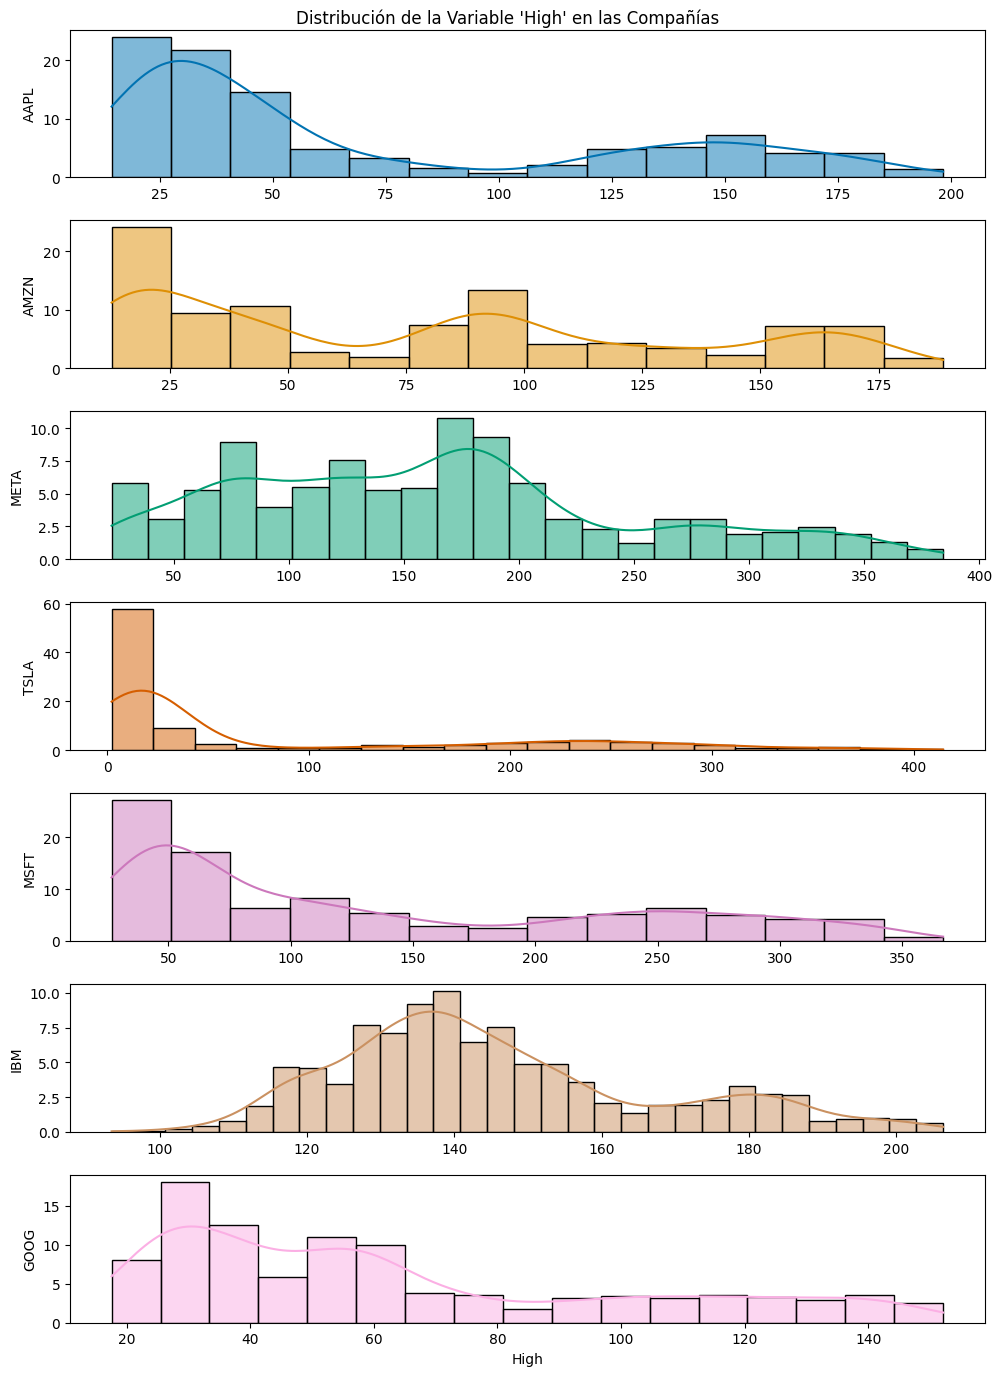

In [67]:
# Considerando la variable a predecir en nuestro modelo
graph_histplot(df, "High")

**Observación:** En la mayoría de los histogramas, se evidencia una inclinación positiva hacia la derecha, denotando un *skewness* positivo, lo que respalda lo mencionado en los boxplots. Además, alrededor del 20% de los precios de las acciones más elevados se sitúan en los valores mínimos, como se refleja en el gráfico que abarca el rango de USD 0-100. Asimismo, en la mayoría de los casos, los histogramas exhiben colas menos pronunciadas y picos menos agudos en comparación con una distribución normal, lo que sugiere una mayor dispersión de datos y una tendencia a poseer pocos valores atípicos, indicando una *kurtosis* negativa. Estas observaciones también se confirman mediante los gráficos de boxplots.

In [102]:
# Confirmando nuestra observación:
skewness=[skew(df[df.id_company==c].High) for c in df.id_company.unique()]
skewness

[0.84637156279336,
 0.4188982470984941,
 0.5002188835225646,
 1.2340326586446617,
 0.6940362745552385,
 0.7148098362367282,
 0.819385735977502]

In [105]:
kurtosis=[kurtosis(df[df.id_company==c].High) for c in df.id_company.unique()]
kurtosis

[-0.8589370497245641,
 -1.1308263857870875,
 -0.39779994264711993,
 0.03383605992463812,
 -0.976103736605789,
 -0.11950122738110869,
 -0.5472424310742392]

**Función para visualizar la correlación de las variable de una compañía**

In [113]:
def graph_corr(df, id):
  sns.heatmap(df[df.id_company==id].corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
  plt.title(f"Correlación de las Variables Numéricas ({id})");

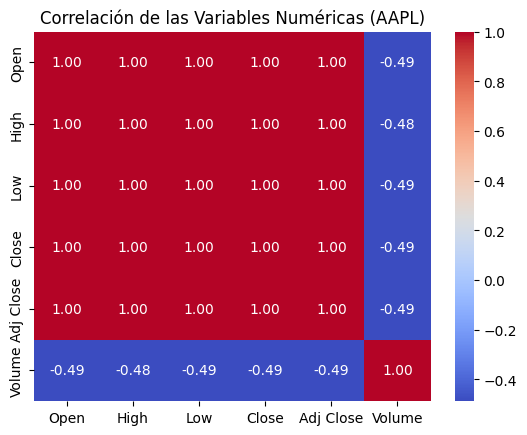

In [117]:
# Apple
graph_corr(df, "AAPL")

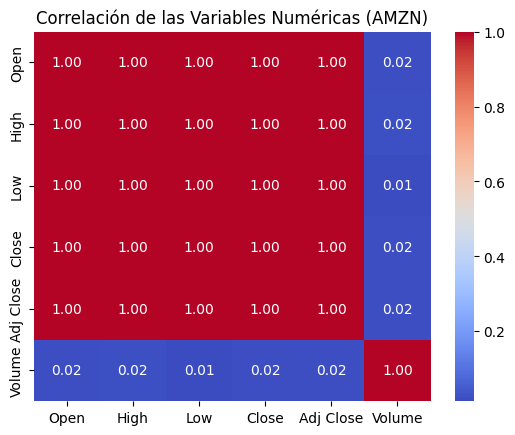

In [118]:
# Amazon
graph_corr(df, "AMZN")

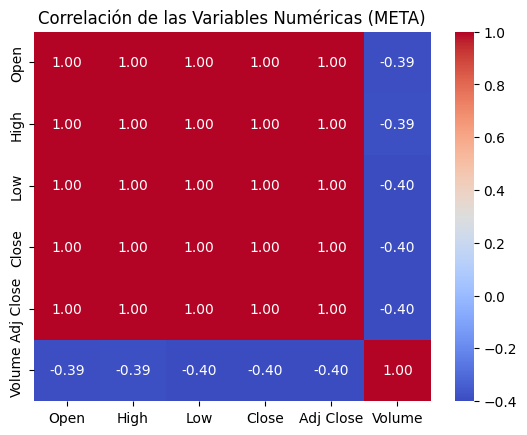

In [120]:
# Meta
graph_corr(df, "META")

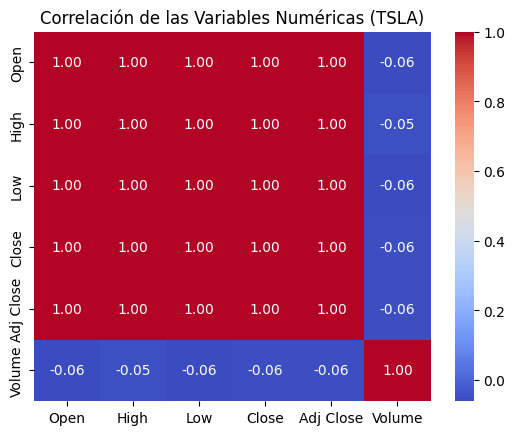

In [121]:
# Tesla
graph_corr(df, "TSLA")

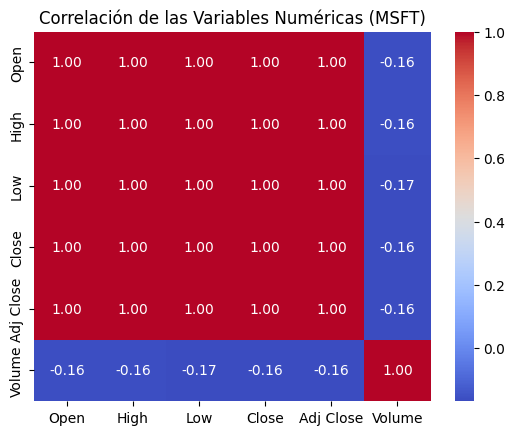

In [122]:
# Microsoft
graph_corr(df, "MSFT")

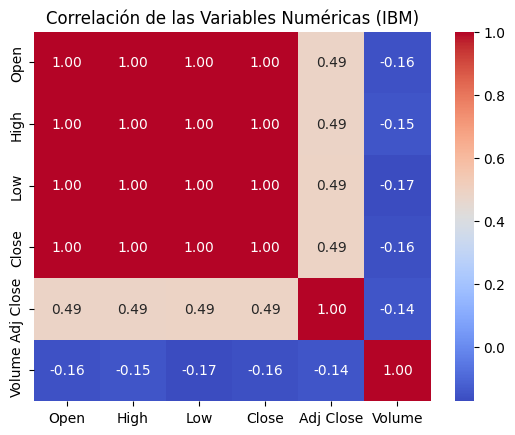

In [123]:
# IBM
graph_corr(df, "IBM")

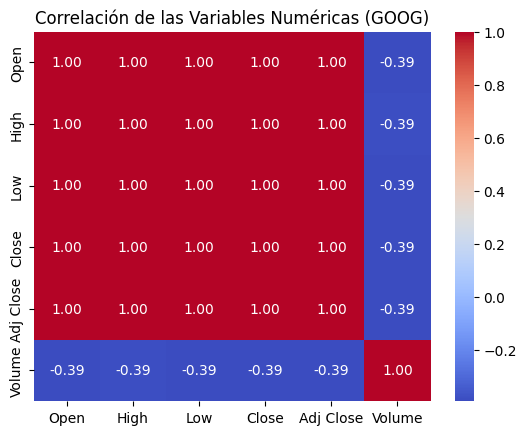

In [124]:
# Google
graph_corr(df, "GOOG")

**Conclusión:** Para desarrollar los modelos de series de tiempo LSTM destinados a las empresas seleccionadas (Apple, IBM, Amazon, Google, Meta, Microsoft y Tesla), se ha optado por incorporar las variables Open, High, Low y Close debido a su marcada correlación positiva entre sí, así como con la variable objetivo, High, lo que indica que cuando una variable aumenta, las demás también lo hacen de manera lineal. Esta elección se fundamenta en la observación de que estas variables capturan información esencial sobre la dinámica diaria de precios en el mercado de acciones. La decisión de excluir otras variables, como Adj Close y Volume, se basa en consideraciones de redundancia y en la variabilidad de las correlaciones entre las diferentes empresas, respectivamente. No obstante, es crucial destacar que esta selección inicial de características se concibe como un punto de partida y está abierta a ajustes y refinamientos durante el proceso experimental. Los modelos podrán ser adaptados y perfeccionados a medida que se evalúe su desempeño en términos de precisión de predicción.